In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [34]:
def build_fuzzy_system():
    rms = ctrl.Antecedent(np.arange(0, 2.1, 0.01), 'rms')
    zcr = ctrl.Antecedent(np.arange(0, 1.1, 0.01), 'zcr')
    output = ctrl.Consequent(np.arange(0, 1.1, 0.01), 'output')

    rms['low'] = fuzz.sigmf(rms.universe, 0.75, -10)
    rms['medium'] = fuzz.gaussmf(rms.universe, 1, 0.25)
    rms['high'] = fuzz.sigmf(rms.universe, 1.25, 10)

    zcr['infrequent'] = fuzz.sigmf(zcr.universe, 0.25, -10)
    zcr['moderate'] = fuzz.gaussmf(zcr.universe, 0.5, 0.15)
    zcr['frequent'] = fuzz.sigmf(zcr.universe, 0.75, 10)

    output['not_loud'] = fuzz.sigmf(output.universe, 0.3, -10)
    output['loud'] = fuzz.sigmf(output.universe, 0.7, 10)

    rules = [
        ctrl.Rule(rms['low'] & zcr['infrequent'], output['not_loud']),
        ctrl.Rule(rms['low'] & zcr['moderate'], output['not_loud']),
        ctrl.Rule(rms['low'] & zcr['frequent'], output['not_loud']),
        ctrl.Rule(rms['medium'] & zcr['infrequent'], output['not_loud']),
        ctrl.Rule(rms['medium'] & zcr['moderate'], output['not_loud']),
        ctrl.Rule(rms['medium'] & zcr['frequent'], output['loud']),
        ctrl.Rule(rms['high'] & zcr['infrequent'], output['loud']),
        ctrl.Rule(rms['high'] & zcr['moderate'], output['loud']),
        ctrl.Rule(rms['high'] & zcr['frequent'], output['loud'])
    ]

    system = ctrl.ControlSystem(rules)
    return system, rms, zcr, output

In [35]:
def detect_loud_sound(rms_val, zcr_val):
    system, _, _, _ = build_fuzzy_system()
    sim = ctrl.ControlSystemSimulation(system)
    sim.input['rms'] = rms_val
    sim.input['zcr'] = zcr_val
    sim.compute()
    return int(round(sim.output['output']))

In [36]:
def visualize_fuzzy_system():
    _, rms, zcr, output = build_fuzzy_system()
    rms.view()
    zcr.view()
    output.view()
    plt.show()

In [37]:
print(detect_loud_sound(0.6, 0.45))

0


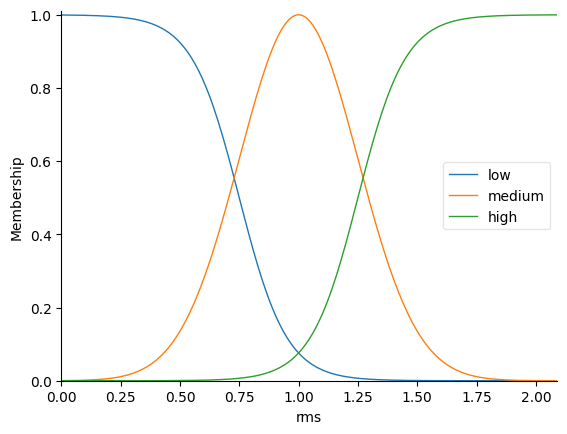

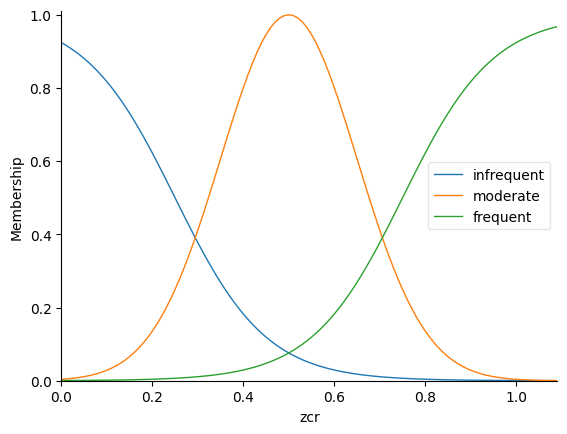

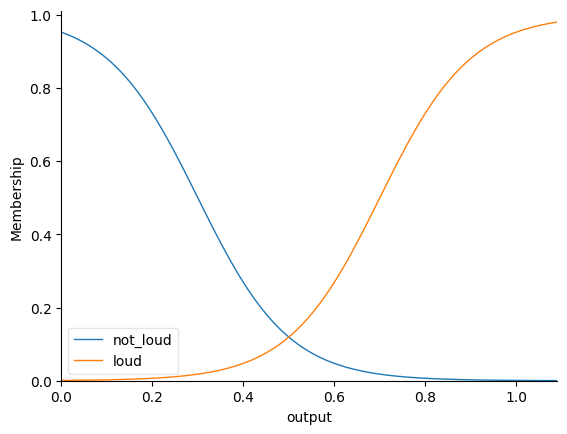

In [38]:
visualize_fuzzy_system()